In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

from tqdm.auto import tqdm


In [5]:
df = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-t-varenichenko-22/My_practice/Modul_6_Statistics/hw_aa.csv', sep = ';')

In [11]:
df.head()

,Unnamed: 0,uid,experimentVariant,version,purchase
0,1,c4ca4238a0b923820dcc509a6f75849b,1,v2.8.0,0
1,2,c81e728d9d4c2f636f067f89cc14862c,0,v2.9.0,0
2,3,eccbc87e4b5ce2fe28308fd9f2a7baf3,1,v2.9.0,0
3,4,a87ff679a2f3e71d9181a67b7542122c,1,v2.8.0,0
4,5,e4da3b7fbbce2345d7772b0674a318d5,1,v2.8.0,0


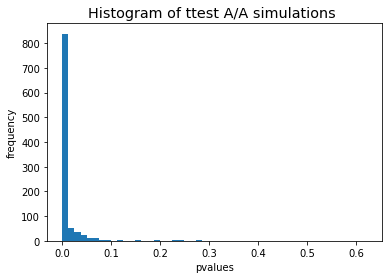

0.946

In [10]:
# Для начала смотрим сходятся ли экспериментальные группы
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[df['experimentVariant'] == 1]['purchase'].sample(n_s, replace = False).values
    s2 = df[df['experimentVariant'] == 0]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) # сохраняем pvalue

plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Проверяем, что количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

In [12]:
# Посмотрим на экспериментальные группы в разрезе версий приложения 
df.groupby(['experimentVariant', 'version'], as_index = False).agg({'purchase': 'mean', 'uid' : 'count'})

# Получается, что сплитование пользователей с версией v2.8.0 может быть некорректно в первую очередь  

,experimentVariant,version,purchase,uid
0,0,v2.8.0,0.000993,41283
1,0,v2.9.0,0.074658,11921
2,0,v3.7.4.0,0.059943,4204
3,0,v3.8.0.0,0.057604,5694
4,1,v2.8.0,0.045606,41552
5,1,v2.9.0,0.071304,12033
6,1,v3.7.4.0,0.063018,4221
7,1,v3.8.0.0,0.062848,6110


In [69]:
# Проверим стат различия версий МП
# Используем t-тест, так как имеем достаточные размере выборок
list = df.version.unique().tolist()
for i in list:
    s1 = df[(df['experimentVariant'] == 1) & (df['version'] == i)]['purchase']
    s2 = df[(df['experimentVariant'] == 0) & (df['version'] == i)]['purchase']
    p_value = stats.ttest_ind(s1, s2)[1]
    if p_value < 0.05:
        print(i)
    else:
        continue


v2.8.0


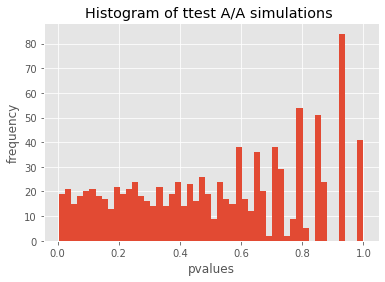

0.045

In [14]:
# Экспериментальные группы при версии приложения v2.8.0 сильно отличаются, поэтому повторим АА-тест без них
n = 100000
simulations = 1000
n_s = 1000
res = []

# Запуск симуляций A/A теста
for i in tqdm(range(simulations)):
    s1 = df[(df['experimentVariant'] == 1) & (df['version'] != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    s2 = df[(df['experimentVariant'] == 0) & (df['version'] != 'v2.8.0')]['purchase'].sample(n_s, replace = False).values
    res.append(stats.ttest_ind(s1, s2, equal_var = False)[1]) 
plt.hist(res, bins = 50)
plt.style.use('ggplot')
plt.xlabel('pvalues')
plt.ylabel('frequency')
plt.title("Histogram of ttest A/A simulations ")
plt.show()

# Количество ложноположительных случаев не превышает альфа
sum(np.array(res) <0.05) / simulations

Вывод: поломка в распределении экмпериментальных групп в версии v2.8.0